# Homework #2 (due 10th of November, 11:59 PM):


### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data. You can select two features for x and y axes at a time and color the samples according to their classes. You are not expected to try all pairs, which would be too many. But please show a few examples. 
- Also use box plots to look at the data. Please show that you are able to examine some features (not all them are necessary).
- Create a training and test set (with shuffling).
- Train a **decision tree classifier** using the training set.
- What are the top 5 most important (discriminative) features?
- Train a **logistic regression model** using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.


In [22]:
# Author: Ertuğrul Demir , ID: 260201059
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

In [23]:
data = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
display(cancer_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


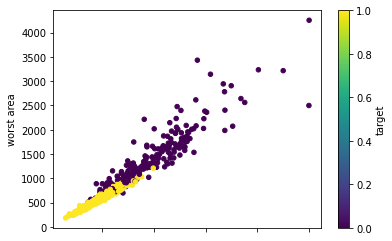

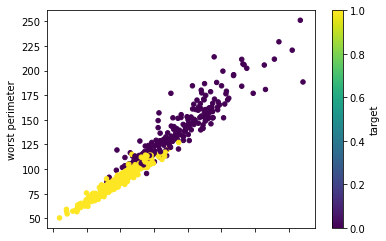

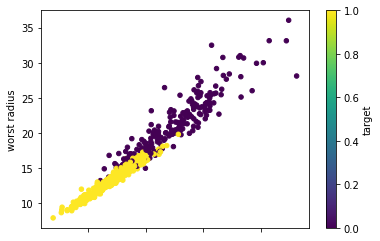

In [24]:
cancer_df.plot.scatter(x='mean area',y='worst area',s=20,c='target',colormap='viridis')           #These are the best plots for me
cancer_df.plot.scatter(x='mean perimeter',y='worst perimeter',s=20,c='target',colormap='viridis')
cancer_df.plot.scatter(x='mean radius',y='worst radius',s=20,c='target',colormap='viridis')

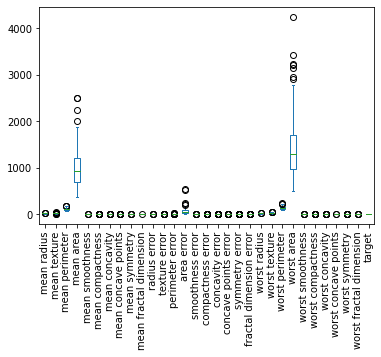

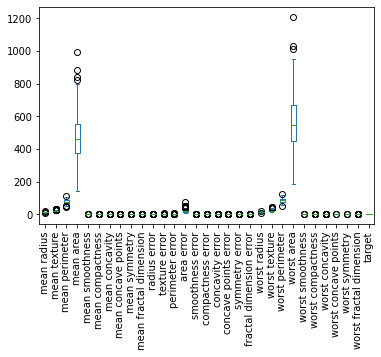

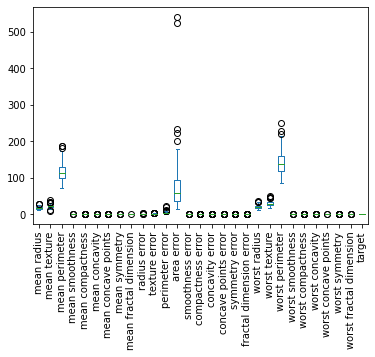

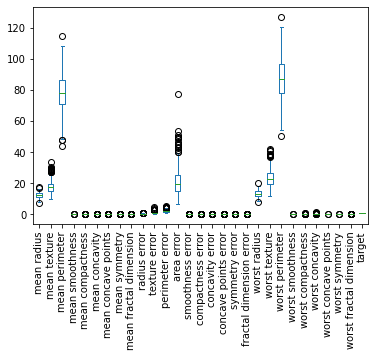

In [25]:
import matplotlib.pyplot as plt   #For better view  #REF : https://stackoverflow.com/questions/32244019/how-to-rotate-x-axis-tick-labels-in-a-pandas-plot
cancer_df[cancer_df['target']==0].plot(kind='box', rot=90)
plt.xlabel("")
plt.show()
cancer_df[cancer_df['target']==1].plot(kind='box', rot=90)
plt.xlabel("")
plt.show()
cancer_df[cancer_df['target']==0].drop(['mean area','worst area'], axis=1).plot(kind='box', rot=90)
plt.xlabel("")
plt.show()
cancer_df[cancer_df['target']==1].drop(['mean area','worst area'], axis=1).plot(kind='box', rot=90)
plt.xlabel("")
plt.show()

In [26]:
train_df, test_df = train_test_split(cancer_df,shuffle=True)
print(len(train_df),len(test_df))

426 143


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


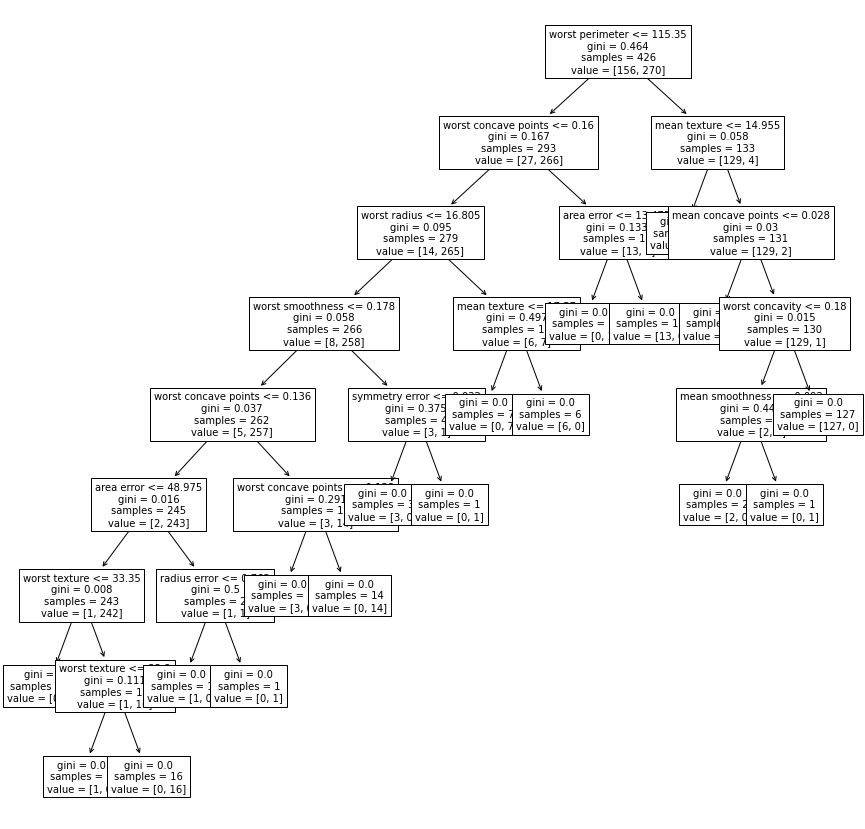

In [27]:
tree = DecisionTreeClassifier(max_depth=10)                   
tree.fit(train_df.drop('target', axis=1), train_df['target'])
from sklearn import tree as tr
pyplot.figure(figsize=(15,15))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

In [28]:
importance = tree.tree_.compute_feature_importances(normalize=False) #Calculate the importance | REF : https://stackoverflow.com/questions/49170296/scikit-learn-feature-importance-calculation-in-decision-trees
print("importance = " + str(importance)+'\n')
important_indeces = np.argsort(importance)[::-1][:5]

i=0
print('5 MOST IMPORTANT FEATURES:')
for x in important_indeces: 
  i += 1
  print(str(i)+'. ',list(cancer_df.columns)[x])

importance = [0.         0.02413616 0.         0.         0.00312989 0.
 0.         0.0045876  0.         0.         0.00234742 0.
 0.         0.00664958 0.         0.         0.         0.
 0.00352113 0.         0.0108325  0.00467552 0.33089951 0.
 0.00988178 0.         0.00152883 0.06200371 0.         0.        ]

5 MOST IMPORTANT FEATURES:
1.  worst perimeter
2.  worst concave points
3.  mean texture
4.  worst radius
5.  worst smoothness


In [29]:
lr_orig = LogisticRegression(C=0.01, max_iter=1000)
lr_orig.fit(train_df.drop(['target'], axis=1),train_df['target'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(C=0.01, max_iter=1000)

In [30]:
score_lr = lr_orig.score(test_df.drop(['target'], axis=1), test_df['target'])
score_tree = tree.score(test_df.drop(['target'], axis=1), test_df['target'])
print('LR Score = ',score_lr)
print('DT Score = ',score_tree,'\n')

if score_lr > score_tree:
  print('LR is better than DT for this test dataset\n')
elif score_lr < score_tree:
  print('DT is better than LR for this test dataset\n')
else:
  print('DT is equal to LR as performance for this test dataset\n')

LR Score =  0.9370629370629371
DT Score =  0.8811188811188811 

LR is better than DT for this test dataset



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


### Part 2)

- Get *winequality_white.csv* which uploaded with the Homework file.

- Last column (quality) is the target variable.

- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

In [31]:
from sklearn.tree import DecisionTreeRegressor
df = pd.read_csv('winequality_white.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [32]:
# Split data to train,val,test for best approach

# temp_df, test_df = train_test_split(df,test_size=0.2,shuffle=True)           
# train_df, val_df = train_test_split(temp_df,test_size=0.25,shuffle=False)
# print('Train Size:',len(train_df),'Val Size:',len(val_df),'Test Size:',len(test_df))


train_df, test_df = train_test_split(df,test_size=0.3,shuffle=True) # Split data to train,test according to the directives
print('Train Size:',len(train_df),'Test Size:',len(test_df))

Train Size: 3428 Test Size: 1470


In [33]:
scores = []  # Similar to grid search
values = []
for depth in range(10,30):
  for split in range(2,20):
    DTR_tree = DecisionTreeRegressor(max_depth= depth, min_samples_split= split )
    DTR_tree.fit(train_df.drop('quality', axis=1), train_df['quality'])

    values.append([depth,split])
    #scores.append(DTR_tree.score(val_df.drop('quality',axis=1), val_df['quality'])) # We shouldn't decide to choose successful model with using test_df so we should use val_df
    scores.append(DTR_tree.score(test_df.drop('quality',axis=1), test_df['quality']))

In [34]:
new_depth, new_split = values[scores.index(max(scores))]
print('MAX SCORE:',max(scores))
print('BEST DEPTH:',new_depth)
print('BEST MIN_SAMPLES_SPLiT:',new_split)

MAX SCORE: 0.2673858935379131
BEST DEPTH: 10
BEST MIN_SAMPLES_SPLiT: 12


In [35]:
DTR_tree = DecisionTreeRegressor(max_depth= new_depth, min_samples_split= new_split )
DTR_tree.fit(train_df.drop('quality', axis=1), train_df['quality'])

DecisionTreeRegressor(max_depth=10, min_samples_split=12)

In [36]:
data=test_df.drop('quality',axis=1)
target=test_df['quality']

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(target,DTR_tree.predict(data))
print("MSE : ", mse)

MSE :  0.5896891243397547
